# Clase 7: Movimiento browniano

## Objetivo de la sesión

Introducir el movimiento browniano como modelo continuo de incertidumbre, comprender sus propiedades fundamentales y establecer su relación con la volatilidad y el modelado financiero.

Al finalizar la sesión, el estudiante deberá poder:

- Comprender el origen del movimiento browniano como límite del random walk
- Identificar sus propiedades matemáticas esenciales
- Interpretar el concepto de volatilidad dentro del proceso
- Simular trayectorias de manera correcta
- Entender su papel como base de los modelos financieros modernos

---

# 1. Del random walk al modelo continuo

En la sesión anterior se introdujo el random walk como modelo básico de evolución aleatoria:

$S_t = S_{t-1} + \epsilon_t$

donde los cambios son independientes y toman valores positivos o negativos con igual probabilidad.

Este modelo permite capturar la incertidumbre de un sistema, pero presenta una limitación importante: el tiempo se modela de forma discreta. En muchos contextos, particularmente en finanzas, el valor de un activo cambia continuamente. Aunque los precios se registren en intervalos discretos (por ejemplo, de forma diaria), el proceso subyacente evoluciona en todo instante.

Al considerar pasos cada vez más pequeños y frecuentes, el random walk converge hacia un proceso continuo. El resultado de este límite es el movimiento browniano, que puede interpretarse como la acumulación continua de un gran número de perturbaciones aleatorias pequeñas e independientes.

---

# 2. Definición del movimiento browniano

El movimiento browniano es un proceso aleatorio continuo en el tiempo que representa la acumulación de cambios aleatorios pequeños e independientes.

Un proceso $(W_t)$ se denomina movimiento browniano estándar si satisface:

1. $(W_0 = 0)$
2. Tiene incrementos independientes
3. Los incrementos siguen una distribución normal
4. La media de cada incremento es cero
5. La varianza crece proporcionalmente al tiempo
6. Sus trayectorias son continuas

Estas propiedades permiten interpretar el proceso como ruido puro acumulado de forma continua.

---

# 3. Propiedades fundamentales

## 3.1 Media

$E[W_t] = 0$

El valor esperado del proceso en cualquier instante es cero. Esto implica que el movimiento browniano no tiene tendencia inherente y describe únicamente fluctuaciones aleatorias alrededor de un valor promedio.

---

## 3.2 Varianza

$Var(W_t) = t$

La varianza crece linealmente con el tiempo. A medida que el horizonte temporal aumenta, también lo hace la incertidumbre sobre el valor futuro del proceso. Esta propiedad constituye una de las bases del concepto de volatilidad en finanzas.

---

## 3.3 Incrementos normales

Para cualquier intervalo de longitud (t):

$W_{t+s} - W_s \sim N(0, t)$

Esto significa que los cambios del proceso:

- dependen únicamente de la longitud del intervalo considerado
- tienen distribución normal
- poseen media cero
- presentan varianza proporcional al tiempo

Los incrementos del proceso no dependen de la trayectoria previa, sino únicamente del tamaño del intervalo.

---

## 3.4 Independencia de incrementos

Los cambios del proceso en intervalos disjuntos son independientes entre sí. Esta propiedad formaliza la idea de que el proceso no tiene memoria: la evolución futura no depende de los cambios pasados, sino únicamente del estado actual.

---

# 4. Introducción de volatilidad

El movimiento browniano estándar puede escalarse mediante un parámetro positivo σ:

$X_t = \sigma W_t$

Entonces:

$Var(X_t) = \sigma^2 t$

El parámetro σ controla la magnitud de las fluctuaciones del proceso. Un valor mayor de σ produce trayectorias más variables; un valor menor produce trayectorias más estables.

En el contexto financiero, σ se interpreta como la volatilidad, es decir, la intensidad de las fluctuaciones de un activo a lo largo del tiempo.

---

# 5. Aproximación discreta del movimiento browniano

Aunque el movimiento browniano se define en tiempo continuo, su simulación se realiza mediante una aproximación discreta.

Se divide el intervalo temporal en pasos pequeños de tamaño (dt). El cambio en cada intervalo se modela como:

$W_{t+dt} = W_t + \sqrt{dt},\epsilon$

donde:

$\epsilon \sim N(0,1)$

El factor $\sqrt{dt}$ garantiza que la varianza acumulada del proceso crezca proporcionalmente al tiempo total. Esta construcción es consistente con el límite del random walk cuando los pasos se vuelven cada vez más pequeños.

---

# 6. Simulación en Python

## Trayectoria individual

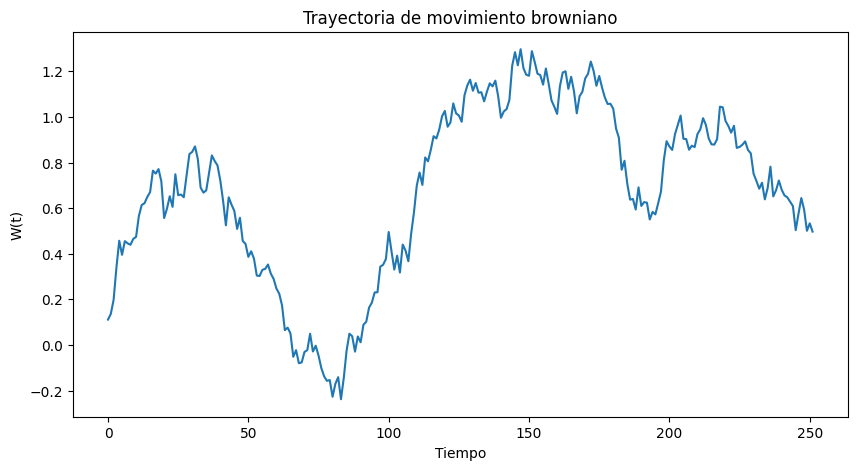

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(0)

T = 1
n = 252
dt = T/n

increments = np.random.normal(0, np.sqrt(dt), size=n)
W = np.cumsum(increments)

plt.figure(figsize=(10,5))
plt.plot(W)
plt.title("Trayectoria de movimiento browniano")
plt.xlabel("Tiempo")
plt.ylabel("W(t)")
plt.show()

## Múltiples trayectorias

Las trayectorias divergen progresivamente conforme aumenta el tiempo, reflejando el crecimiento de la incertidumbre.

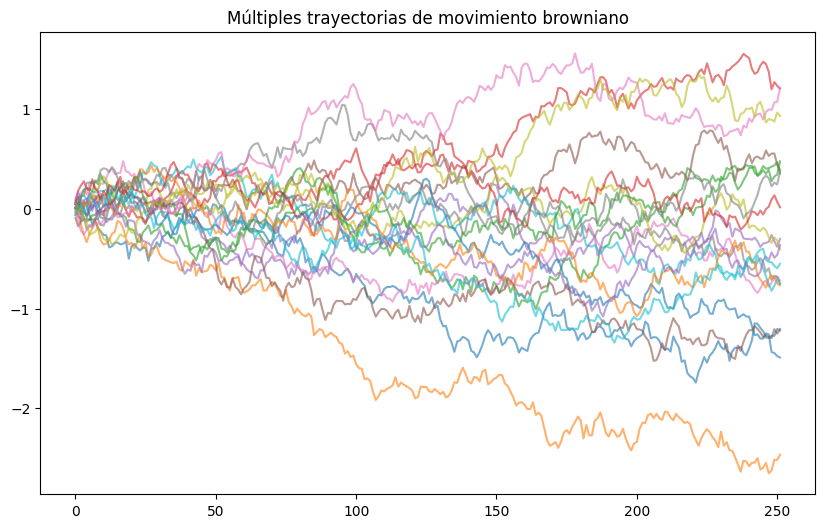

In [2]:
plt.figure(figsize=(10,6))

for _ in range(20):
    increments = np.random.normal(0, np.sqrt(dt), size=n)
    W = np.cumsum(increments)
    plt.plot(W, alpha=0.6)

plt.title("Múltiples trayectorias de movimiento browniano")
plt.show()


## Distribución en un tiempo fijo

La distribución resultante es aproximadamente normal con media cero y varianza proporcional al tiempo total.

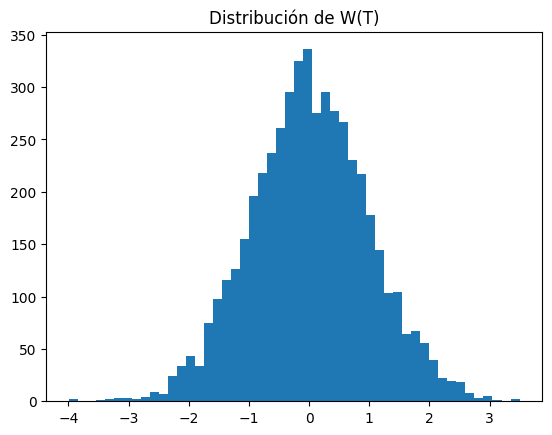

In [3]:
n_sim = 5000
final_values = []

for _ in range(n_sim):
    increments = np.random.normal(0, np.sqrt(dt), size=n)
    final_values.append(np.sum(increments))

plt.hist(final_values, bins=50)
plt.title("Distribución de W(T)")
plt.show()

# 7. Interpretación en el contexto financiero

El movimiento browniano describe fluctuaciones aleatorias sin tendencia y puede interpretarse como un modelo de ruido continuo. Por sí mismo, no modela directamente el precio de un activo, sino la componente aleatoria que afecta su evolución.

Un modelo simple de retornos puede escribirse como:

$X_t = \mu t + \sigma W_t$

donde:

- μ representa la tendencia promedio
- σ representa la volatilidad
- (W_t) representa la componente aleatoria

Este tipo de procesos constituye la base de los modelos estocásticos utilizados en finanzas.

---

# 8. Conexión con el movimiento geométrico browniano

Aunque el movimiento browniano permite describir la evolución de una variable aleatoria en el tiempo, no es adecuado por sí mismo para modelar precios de activos financieros. Una razón fundamental es que el movimiento browniano puede tomar valores negativos, mientras que los precios de activos deben permanecer positivos.

Además, en los mercados financieros los cambios en el precio suelen ser proporcionales al nivel del propio precio. Activos con valores más altos tienden a presentar fluctuaciones absolutas mayores que activos con valores más bajos. Esto sugiere que el componente aleatorio debe escalar con el nivel del precio.

Para capturar estas características se introduce el movimiento geométrico browniano, modelo ampliamente utilizado en finanzas cuantitativas. Este proceso se define mediante la ecuación:

$dS_t = \mu S_t,dt + \sigma S_t,dW_t$

donde:

- $(S_t)$ representa el precio del activo en el tiempo
- $μ$ es la tasa de crecimiento esperada
- $σ$ es la volatilidad
- $(W_t)$ es un movimiento browniano

Este modelo incorpora dos elementos esenciales:

1. El crecimiento esperado del precio es proporcional a su nivel actual
2. La magnitud de las fluctuaciones aleatorias también es proporcional al precio

Como consecuencia, el precio permanece siempre positivo y los retornos logarítmicos siguen una distribución normal. Estas propiedades hacen del movimiento geométrico browniano el modelo base para la simulación de precios, la valuación de derivados y el análisis cuantitativo del riesgo.